In [25]:
# Load data
customers = pd.read_json("dim_customer.json")
invoices = pd.read_csv("fct_invoice.csv")


In [10]:
# Easy

In [7]:
# 1. How many unique customers are in the dataset?
unique_customers = customers['id'].nunique()
print("Number of unique customers:", unique_customers)


Number of unique customers: 5191


In [26]:
# 2. What are the different categories of products available? How many unique categories are there?

# Get all unique product categories
unique_categories = invoices['category'].unique()

# Count how many unique categories there are
num_categories = invoices['category'].nunique()

# Display the results
print("Unique categories:", unique_categories)
print("Number of unique categories:", num_categories)


Unique categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


In [27]:
# 3. Which payment method is the most popular? How many times was it used?

# Find the most frequently used payment method
popular_payment = invoices['payment_method'].value_counts().idxmax()

# Find how many times it was used
count = invoices['payment_method'].value_counts().max()

# Display the results
print("Most popular payment method:", popular_payment)
print("Times used:", count)


Most popular payment method: Cash
Times used: 44447


In [11]:
# Medium

In [32]:
# 1. What are the three most popular categories, by total sales?

# Add commas
pd.set_option("display.float_format", "{:,.0f}".format)

# Calculate total sales for each invoice
invoices["sales"] = invoices["quantity"] * invoices["price"]

# Sum sales by product category and sort in descending order
category_sales = invoices.groupby("category")["sales"].sum().sort_values(ascending=False)

# Select the top 3 categories by total sales
top3_categories = category_sales.head(3)

# Display the results
print(top3_categories)


category
Clothing     113,996,791
Shoes         66,553,451
Technology    57,862,350
Name: sales, dtype: float64


In [24]:
# 2. What are the total sales attributed to customers over the age of 45?

# Calculate sales for each invoice
invoices["sales"] = invoices["quantity"] * invoices["price"]

# Merge invoices with customer data to access age information
merged = invoices.merge(customers, left_on="customer_id", right_on="id")

# Filter only customers who are older than 45
over_45 = merged[merged["age"] > 45]

# Calculate total sales for these customers
total_sales_over_45 = over_45["sales"].sum()

# Display the result in a readable format
print(f"Total sales from customers over 45: {total_sales_over_45:,.0f}")


Total sales from customers over 45: 82,039,768


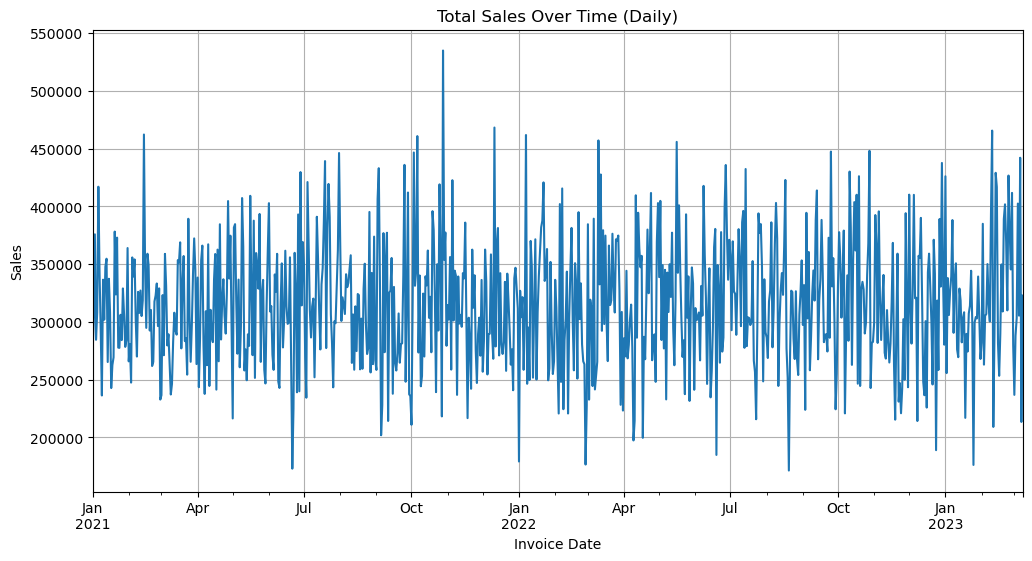

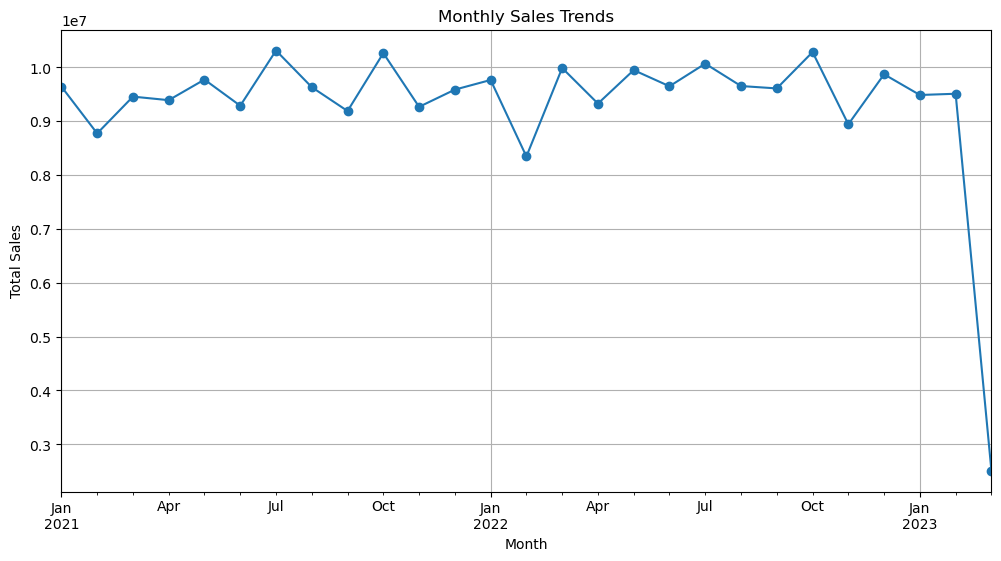

In [23]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import matplotlib.pyplot as plt

# Convert invoice_date to datetime using dayfirst=True
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"], dayfirst=True)

# Group by date and sum sales (daily distribution)
daily_sales = invoices.groupby("invoice_date")["sales"].sum()

# Plot daily sales
plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title("Total Sales Over Time (Daily)")
plt.xlabel("Invoice Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Resample by month to observe seasonal trends
monthly_sales = daily_sales.resample("ME").sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [29]:
# Hard

In [33]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

# Ensure sales column exists
invoices["sales"] = invoices["quantity"] * invoices["price"]

# Merge invoices with customers to access age information
merged = invoices.merge(customers, left_on="customer_id", right_on="id")

# Drop rows where age is missing and make an explicit copy to avoid SettingWithCopyWarning
merged_clean = merged.dropna(subset=["age"]).copy()

# Create a new column 'age_decade' to group customers by decade safely
merged_clean.loc[:, "age_decade"] = (merged_clean["age"] // 10 * 10)
merged_clean.loc[:, "age_decade"] = merged_clean["age_decade"].astype(int).astype(str) + "-" + \
                                    (merged_clean["age_decade"] + 9).astype(int).astype(str)

# Create pivot table with rows = category, columns = age decade, values = total sales
pivot_table = merged_clean.pivot_table(
    index="category",       
    columns="age_decade",   
    values="sales",           
    aggfunc="sum",          
    fill_value=0      
)

# Add commas
pd.set_option("display.float_format", "{:,.0f}".format)

# Display the results
print(pivot_table)


age_decade          10-19      20-29      30-39      40-49      50-59  \
category                                                                
Books              12,802     79,462     84,143     87,203     74,962   
Clothing        1,927,414 10,250,733 11,354,127 11,215,190 10,321,852   
Cosmetics         109,619    605,915    723,545    665,035    587,781   
Food & Beverage    13,582     73,492     87,247     89,553     72,425   
Shoes             993,281  5,924,878  7,200,840  7,025,590  5,852,858   
Souvenir           12,375     54,943     64,093     66,392     54,943   
Technology      1,129,800  5,261,550  6,159,300  5,954,550  4,435,200   
Toys               60,426    385,101    420,582    390,907    345,068   

age_decade           60-69     70-79     80-89  
category                                        
Books               80,477    54,828    26,664  
Clothing        10,660,642 7,769,371 4,493,698  
Cosmetics          649,991   419,083   254,532  
Food & Beverage     80,9

C:\Users\Ashley\AppData\Local\Temp\ipykernel_18136\384616207.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['30-39' '40-49' '40-49' ... '50-59' '30-39' '60-69']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_clean.loc[:, "age_decade"] = merged_clean["age_decade"].astype(int).astype(str) + "-" + \
